In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier, XGBRegressor, XGBRFRegressor
from xgboost import plot_importance

In [2]:
train = pd.read_csv('data/FIFA_train.csv')
test = pd.read_csv('data/FIFA_test.csv')

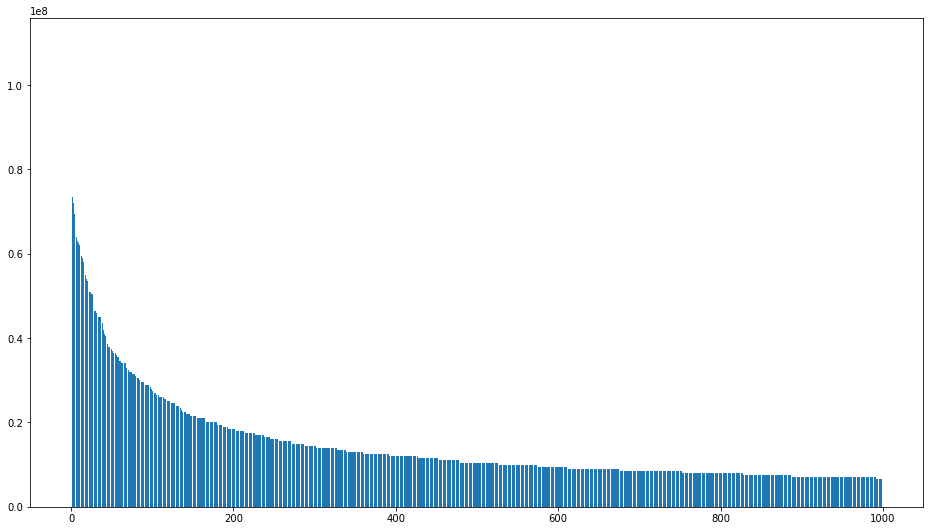

In [3]:
train_pl_values = train['value'].sort_values(ascending=False)[:1000]

plt.figure(figsize=(16, 9))
plt.bar(np.arange(train_pl_values.count()), train_pl_values.values.reshape(-1))
plt.show()

In [4]:
train

,id,name,age,continent,contract_until,position,prefer_foot,reputation,stat_overall,stat_potential,stat_skill_moves,value
0,0,L. Messi,31,south america,2021,ST,left,5.0,94,94,4.0,110500000.0
1,3,De Gea,27,europe,2020,GK,right,4.0,91,93,1.0,72000000.0
2,7,L. Suárez,31,south america,2021,ST,right,5.0,91,91,3.0,80000000.0
3,8,Sergio Ramos,32,europe,2020,DF,right,4.0,91,91,3.0,51000000.0
4,9,J. Oblak,25,europe,2021,GK,right,3.0,90,93,1.0,68000000.0
...,...,...,...,...,...,...,...,...,...,...,...,...
8927,16925,S. Adewusi,18,africa,2019,MF,right,1.0,48,63,3.0,60000.0
8928,16936,C. Ehlich,19,europe,2020,DF,right,1.0,47,59,2.0,40000.0
8929,16941,N. Fuentes,18,south america,2021,DF,right,1.0,47,64,2.0,50000.0
8930,16942,J. Milli,18,europe,2021,GK,right,1.0,47,65,1.0,50000.0


In [5]:
# 우선 stat에 potential에 기반한 EDA 후 인사이트 정리 -> 유명도 본후 포지션

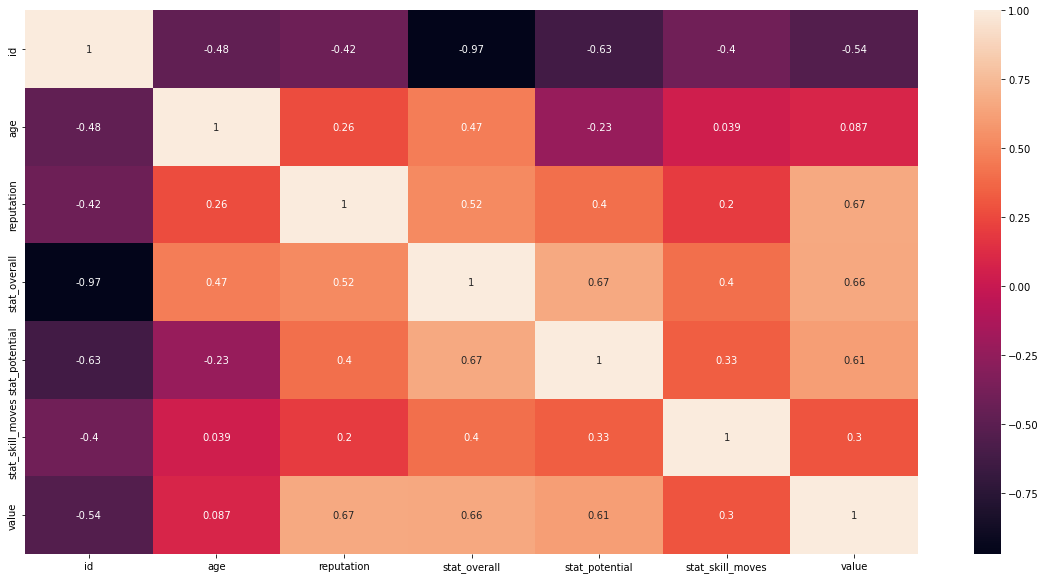

In [6]:
plt.figure(figsize=(20, 10))
sns.heatmap(
    train.corr(),
    annot=True,
)

plt.show()

C:\Users\Jun\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


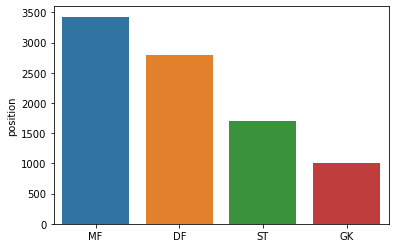

In [7]:
position_val = train['position'].value_counts()
sns.barplot(position_val.index, position_val)
plt.show()

C:\Users\Jun\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


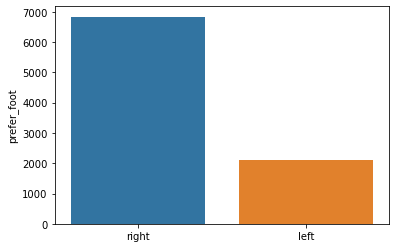

In [8]:
prefer_foot_val = train['prefer_foot'].value_counts()
sns.barplot(prefer_foot_val.index, prefer_foot_val)
plt.show()

C:\Users\Jun\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


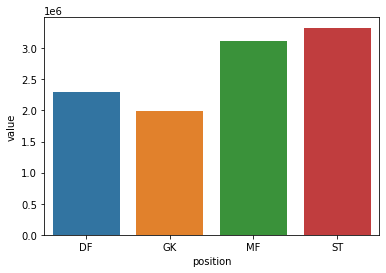

In [9]:
# 포지션과 value는 크게 관련이 없다는 결과가 나옴

value_per_position = train.groupby('position')['value'].mean()
sns.barplot(value_per_position.index, value_per_position)
plt.show()

C:\Users\Jun\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


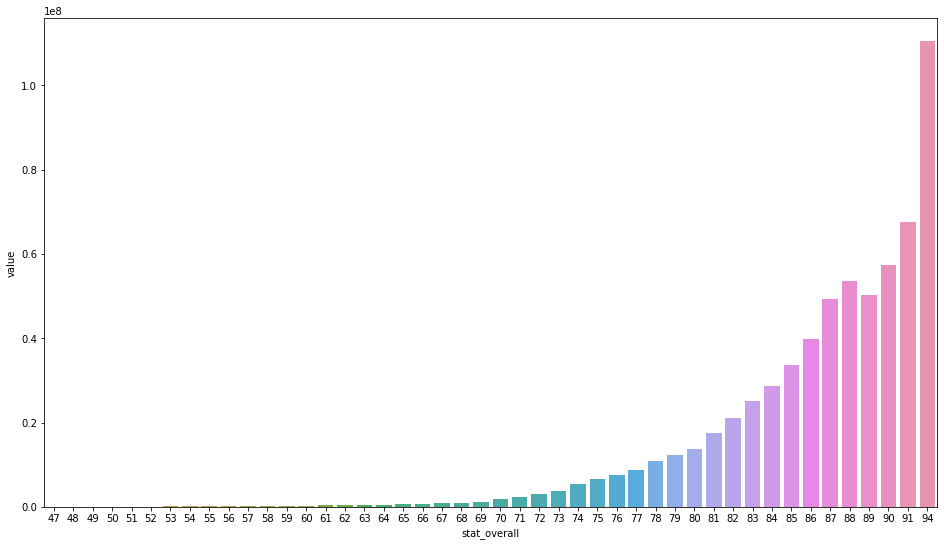

In [10]:
value_per_stats = train.groupby('stat_overall')['value'].mean()

plt.figure(figsize=(16, 9))
sns.barplot(value_per_stats.index, value_per_stats)
plt.show()

In [11]:
train['reputation'] = np.power(train['reputation'], 2)
train['stat_potential'] = np.power(train['stat_potential'], 3)
train['stat_overall'] = np.power(train['stat_overall'], 3)

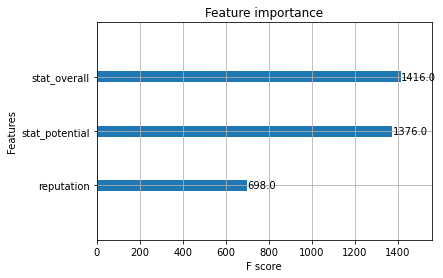

train : 0.9660157200961479
valid : 0.9137719768115524


In [17]:
model = XGBRegressor()

X = train.drop(
    columns=['value', 'position', 'name', 'age', 'id', 'prefer_foot', 'stat_skill_moves', 'continent',
             'contract_until'])
y = train['value']

X_train, X_valid, y_train, y_valid = train_test_split(X, y, train_size=0.8)

model.fit(X_train, y_train)

plot_importance(model)
plt.show()

print("train :", model.score(X_train, y_train))
print("valid :", model.score(X_valid, y_valid))

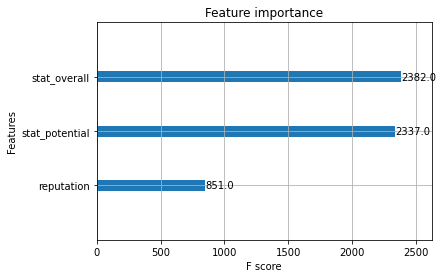

train : 0.9552160174792356
valid : 0.9457432576991964


In [16]:
model = XGBRFRegressor()

X = train.drop(
    columns=['value', 'position', 'name', 'age', 'id', 'prefer_foot', 'stat_skill_moves', 'continent',
             'contract_until'])
y = train['value']

X_train, X_valid, y_train, y_valid = train_test_split(X, y, train_size=0.8)

model.fit(X_train, y_train)

plot_importance(model)
plt.show()

print("train :", model.score(X_train, y_train))
print("valid :", model.score(X_valid, y_valid))